In [68]:
import numpy as np
from scipy.io import loadmat
from scipy.stats import multivariate_normal as norm
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay

In [57]:
def create_complete_datasets(data_dict):
    '''
    Function for creating complete training and test sets containing
    all classes.
    '''
    #Empty list
    trainset = []
    traintargets =[]
    testset = []
    testtargets =[]
    
    #For each class
    for i in range(10):
        trainset.append(data_dict["train%d"%i])
        traintargets.append(np.full(len(data_dict["train%d"%i]),i))
        testset.append(data_dict["test%d"%i])
        testtargets.append(np.full(len(data_dict["test%d"%i]),i))
    
    #Concatenate into to complete datasets
    trainset = np.concatenate(trainset)
    traintargets = np.concatenate(traintargets)
    testset = np.concatenate(testset)
    testtargets = np.concatenate(testtargets)
    return trainset, traintargets, testset, testtargets

file = "data/mnist_all.mat"
data = loadmat(file)

#Complete training and test sets
train_set, train_targets, test_set, test_targets = create_complete_datasets(data)

In [59]:
n_components = 9
#PCA
pca = PCA(n_components = n_components)
pca.fit(train_set)
train_pca = pca.transform(train_set)
test_pca = pca.transform(test_set)
#LDA
lda = LDA(n_components = n_components)
lda.fit(train_set, train_targets)
train_lda = lda.transform(train_set)
test_lda = lda.transform(test_set)


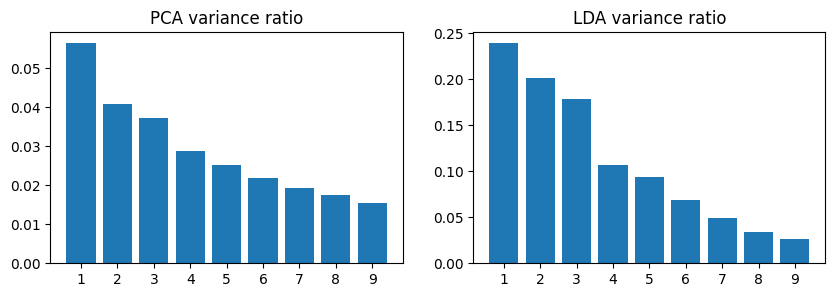

In [60]:
# Analyze proportion of Variance. If num_components=2 try to visualize dim. reduced data.
plt.figure(figsize=(10, 3))
plt.subplot(1,2,1)
plt.title('PCA variance ratio')
plt.bar([*range(1, n_components + 1)], pca.explained_variance_ratio_)
plt.xticks([*range(1, n_components + 1)])

plt.subplot(1,2,2)
plt.title('LDA variance ratio')
plt.bar([*range(1, n_components + 1)], lda.explained_variance_ratio_)
plt.xticks([*range(1, n_components + 1)])
plt.show()

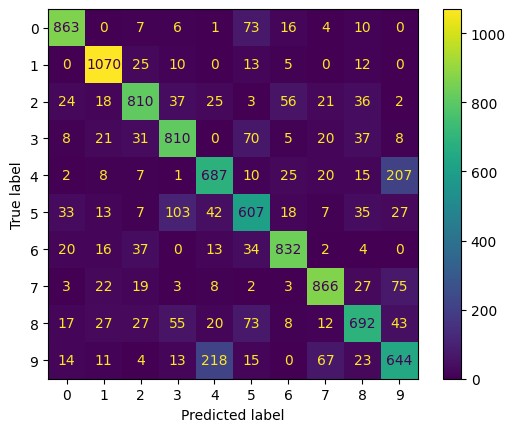

In [70]:
# Logistic regression
def logreg_clf(train_set, train_targets, test_set, test_targets, random_state=42):
    clf_lr = LogisticRegression(max_iter=300, random_state=random_state)
    clf_lr.fit(train_set, train_targets)
    test_predictions = clf_lr.predict(test_set)

    cm = confusion_matrix(test_targets, test_predictions)

    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf_lr.classes_)
    disp.plot()
    plt.show()

logreg_clf(train_pca, train_targets, test_pca, test_targets, random_state=42)


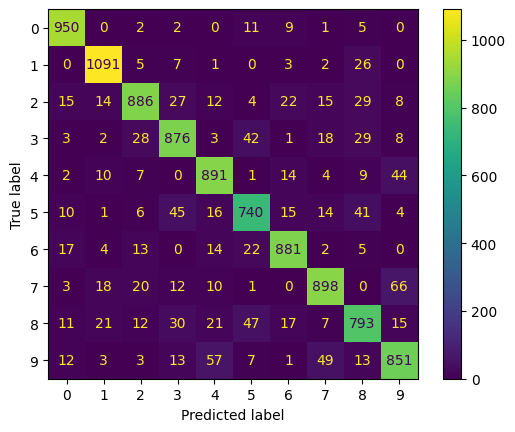

In [71]:
logreg_clf(train_lda, train_targets, test_lda, test_targets, random_state=42)

In [ ]:
# MLP regression
def mlp_clf(train_set, train_targets, test_set, test_targets, random_state=42):
    clf_lr = LogisticRegression(max_iter=300, random_state=random_state)
    clf_lr.fit(train_set, train_targets)
    test_predictions = clf_lr.predict(test_set)

    cm = confusion_matrix(test_targets, test_predictions)

    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf_lr.classes_)
    disp.plot()
    plt.show()